# STAT3612 Lecture 3 - 	Generalized Linear Models

[Dr. Aijun Zhang](http://www.statsoft.org) - [STAT3622 Data Visualization](http://www.statsoft.org/teaching/stat3622/)

28 January 2019

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris = datasets.load_iris()
X = iris.data[:,[0,1,2]]
y = iris.data[:,3]

# Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)
print('Intercept:', lm.intercept_)
print('Coefficients:', lm.coef_)

Intercept: -0.24872358602445543
Coefficients: [-0.21027133  0.22877721  0.52608818]


In [3]:
import statsmodels.api as sm

X1 = sm.add_constant(X)
lm = sm.OLS(y,X1).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     736.9
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           6.20e-88
Time:                        21:13:53   Log-Likelihood:                 36.809
No. Observations:                 150   AIC:                            -65.62
Df Residuals:                     146   BIC:                            -53.57
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2487      0.178     -1.396      0.1

## Model diagnostics


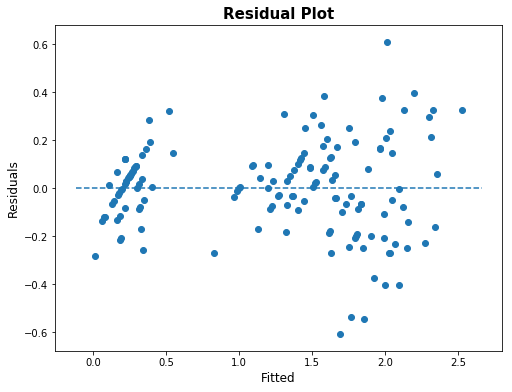

In [4]:
import matplotlib.pyplot as plt
lowess = sm.nonparametric.lowess

yhat = lm.predict(X1)
res = yhat-y

plt.figure(1, figsize=(8, 6))
plt.scatter(yhat, res)
plt.plot(plt.xlim(), [0,0], linestyle='dashed')
plt.xlabel('Fitted', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Residual Plot',fontsize=15, fontweight="bold")
plt.show()

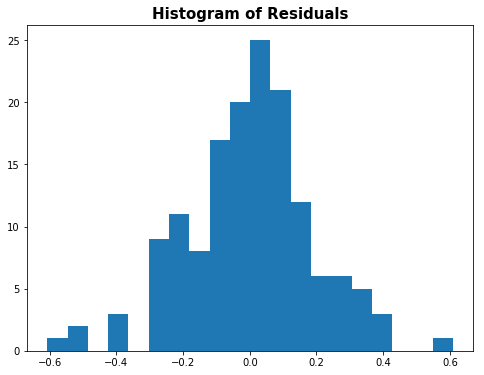

In [5]:
plt.figure(1, figsize=(8, 6))
plt.hist(res, bins=20)
plt.title('Histogram of Residuals',fontsize=15, fontweight="bold")
plt.show()

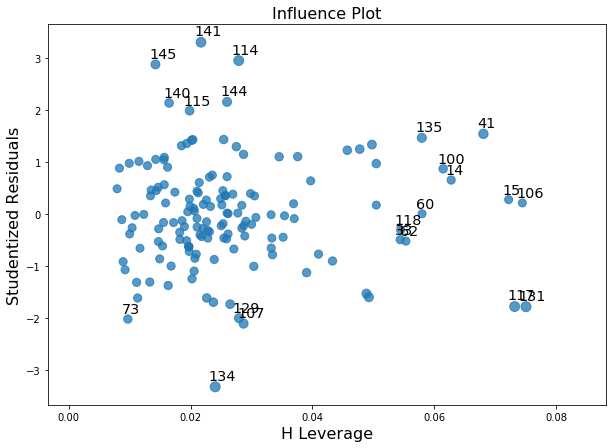

In [6]:
fig, ax = plt.subplots(figsize=(10,7))
sm.graphics.influence_plot(lm, ax=ax, size=10)
plt.show()

## Detect Collinearity

In [7]:
np.corrcoef(X.T).round(2)

array([[ 1.  , -0.11,  0.87],
       [-0.11,  1.  , -0.42],
       [ 0.87, -0.42,  1.  ]])

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

VIF = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
np.round(VIF,2)

array([204.77,  85.62,  36.71])

# Logistic Regression, Softmax Regression

# Poisson Regression, Cox Regression

To be continued ... 